In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/Ixiondbz/House-Prices-Prediction-Advanced-Regression-Techniques-/main/train_numerical.csv")

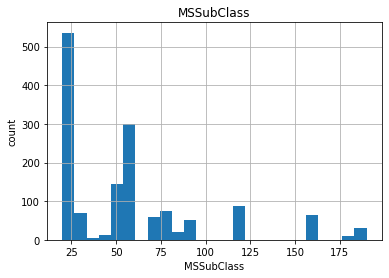

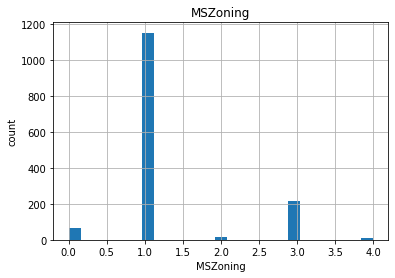

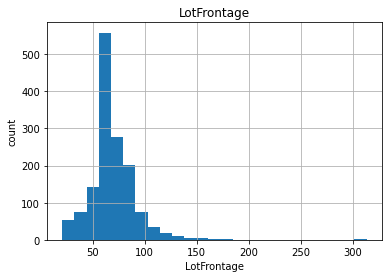

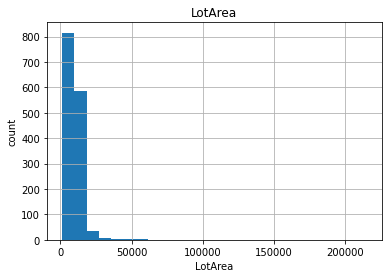

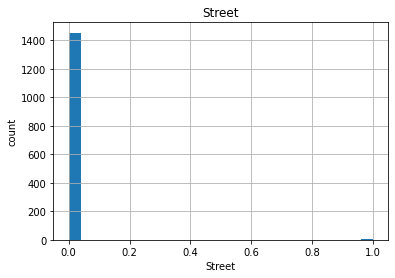

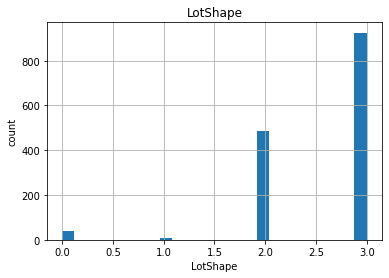

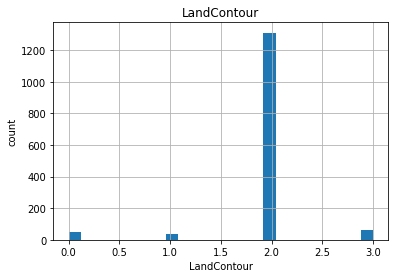

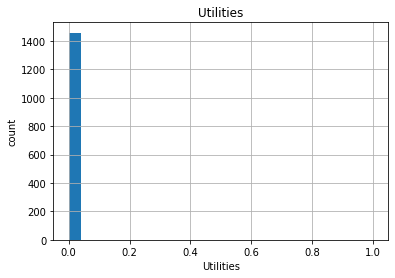

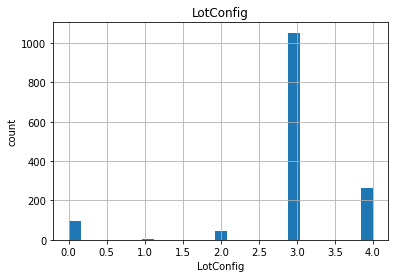

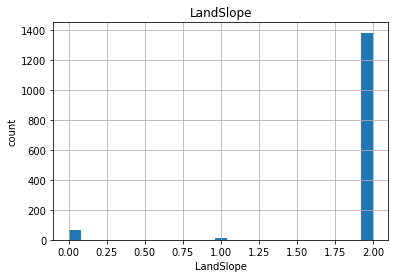

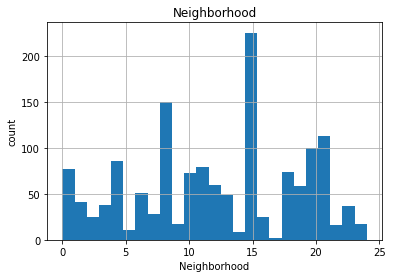

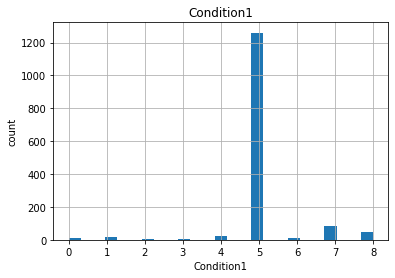

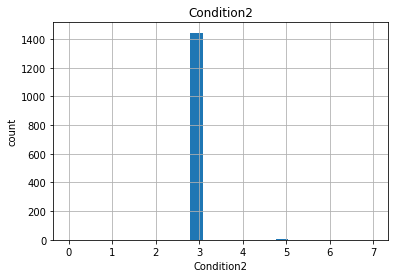

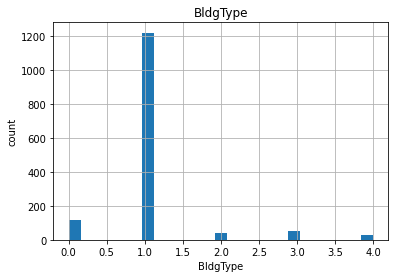

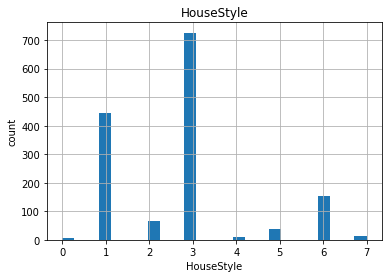

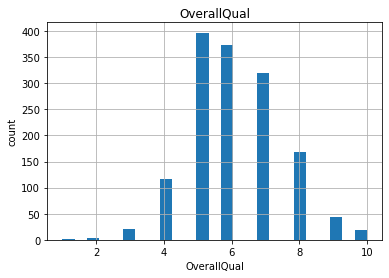

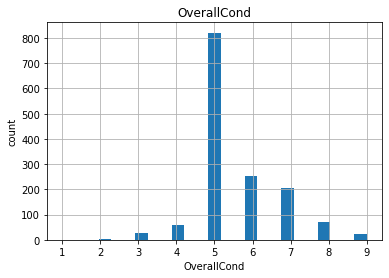

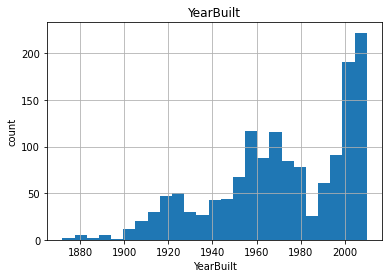

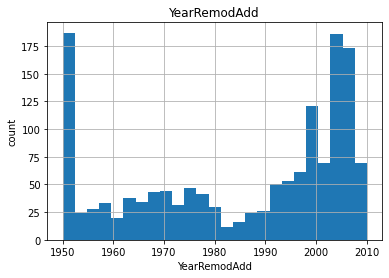

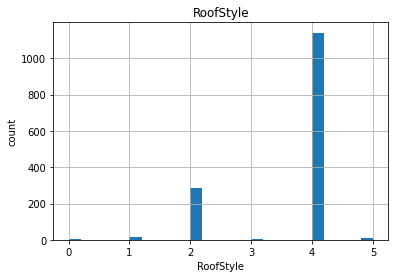

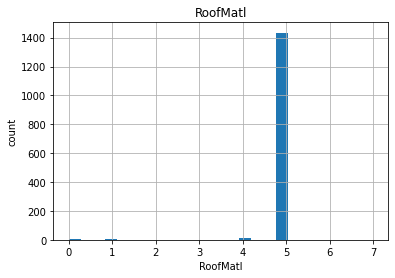

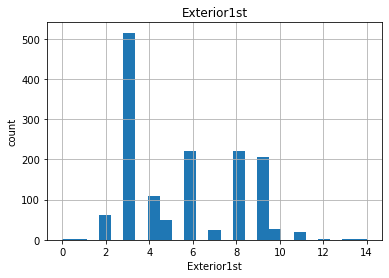

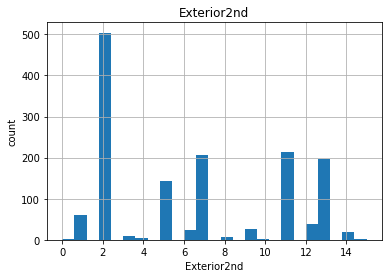

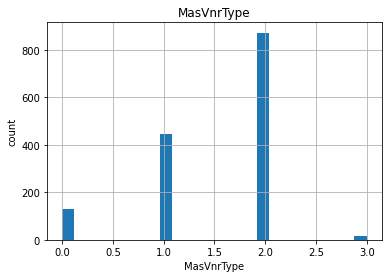

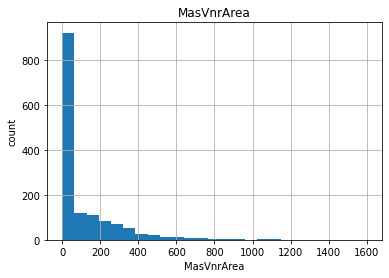

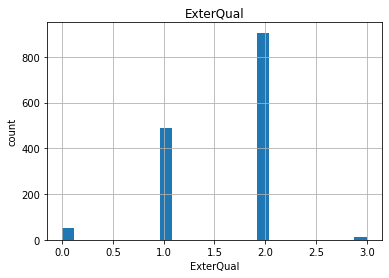

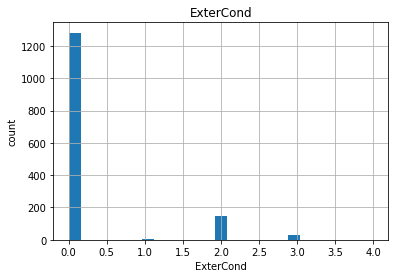

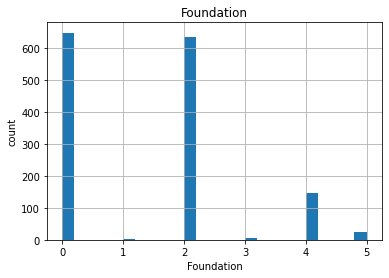

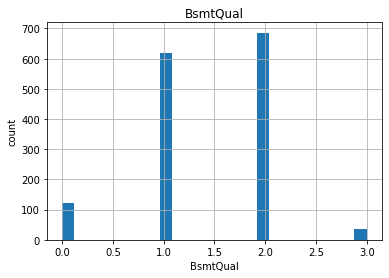

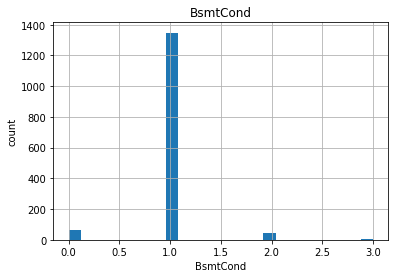

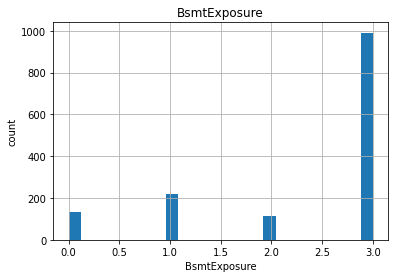

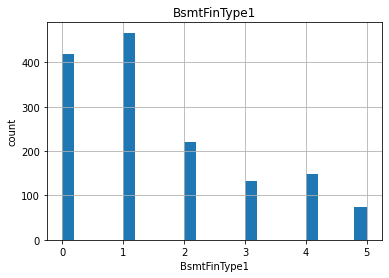

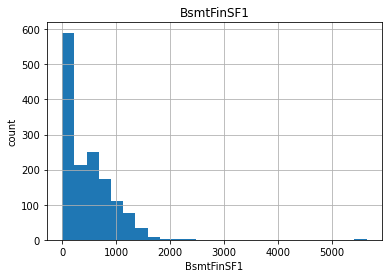

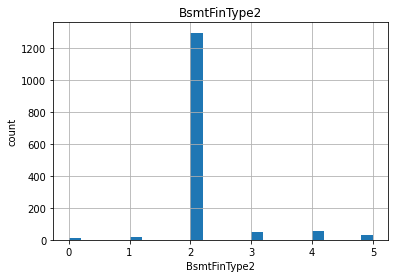

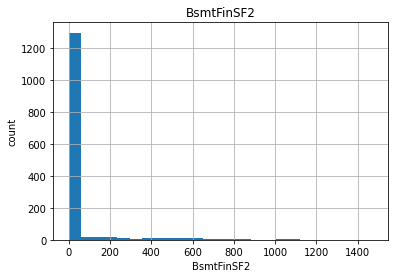

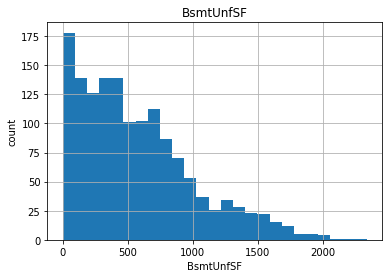

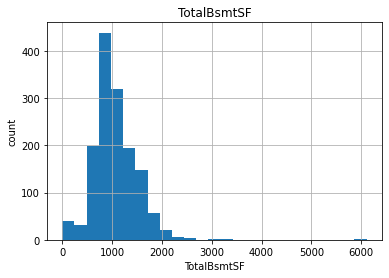

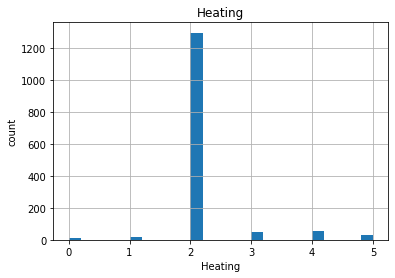

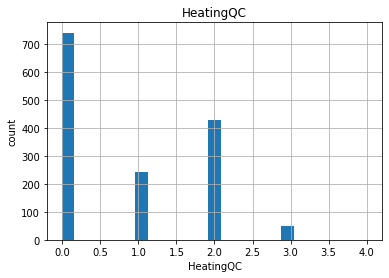

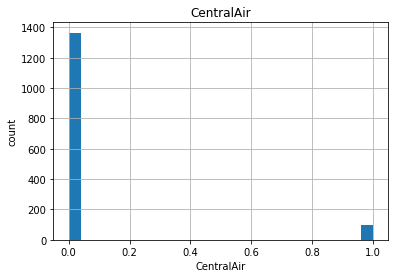

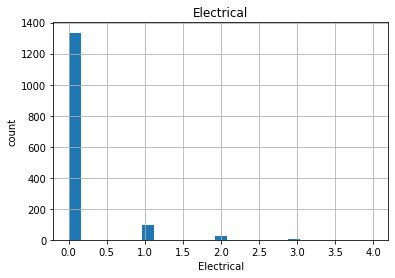

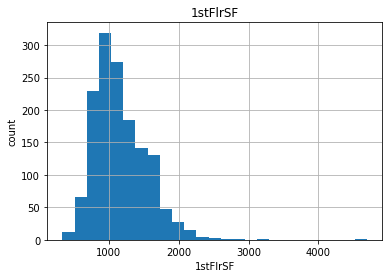

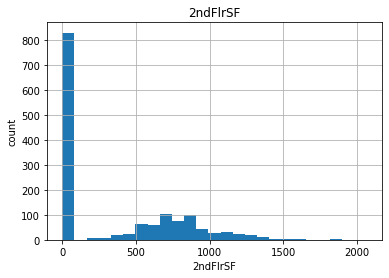

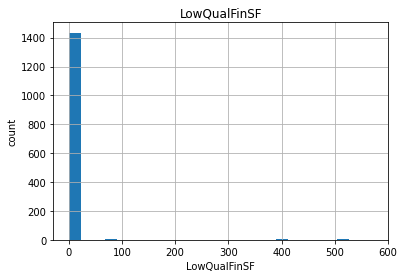

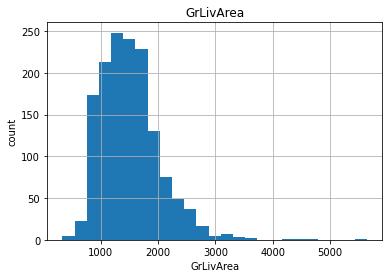

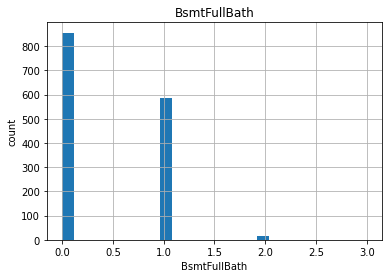

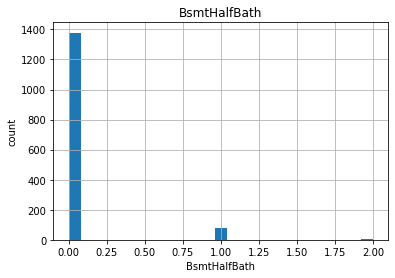

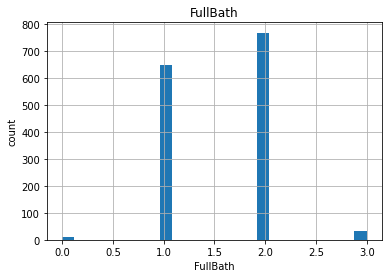

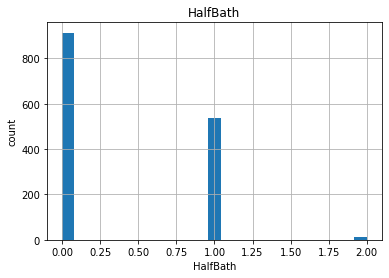

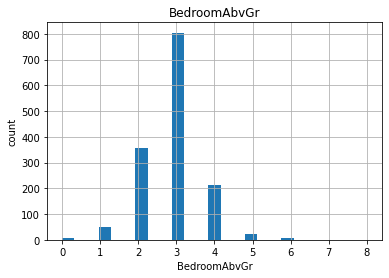

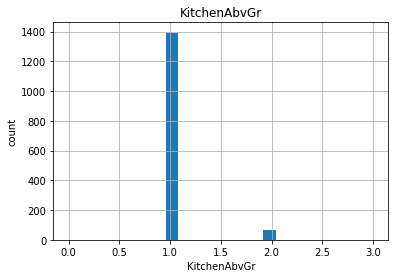

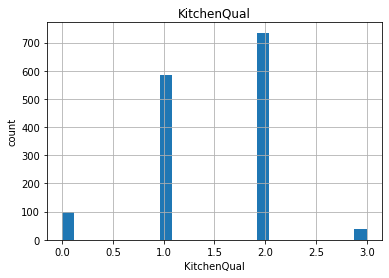

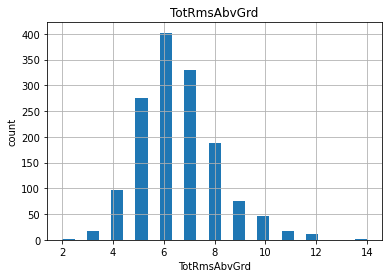

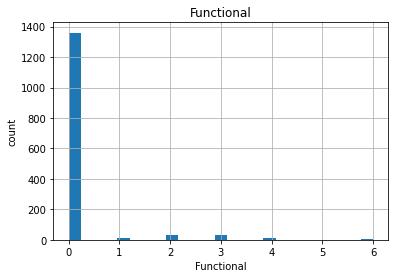

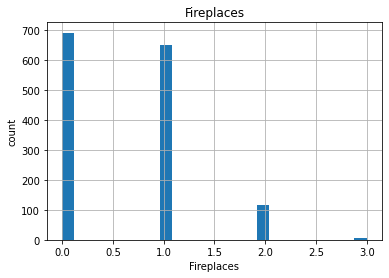

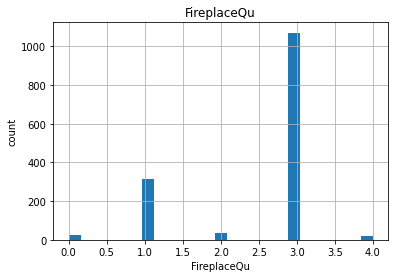

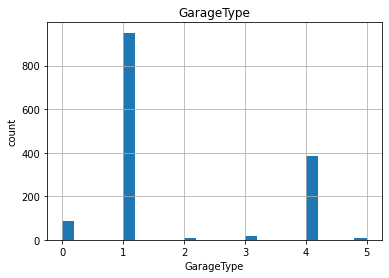

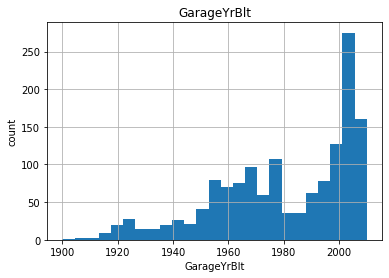

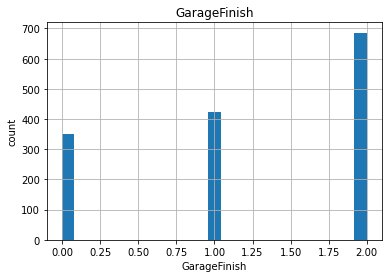

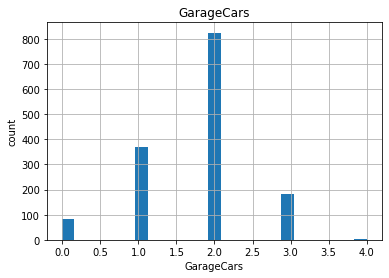

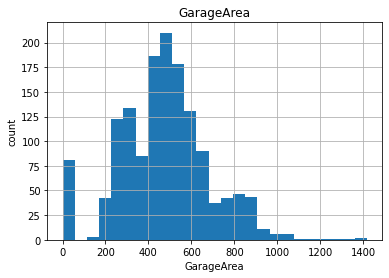

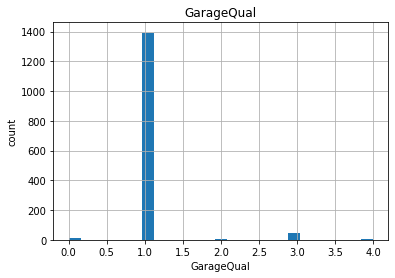

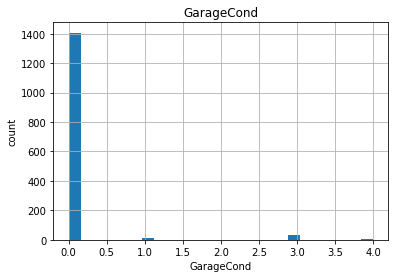

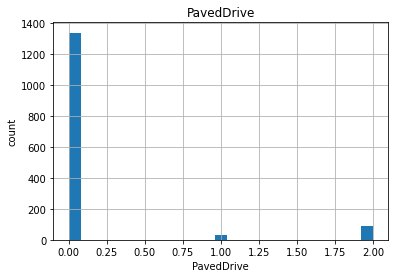

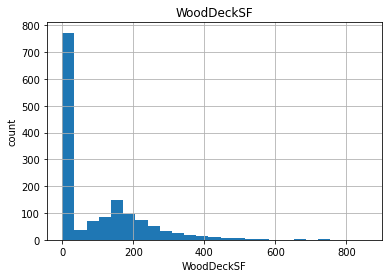

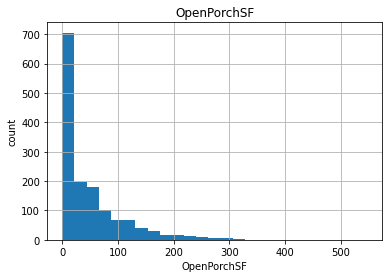

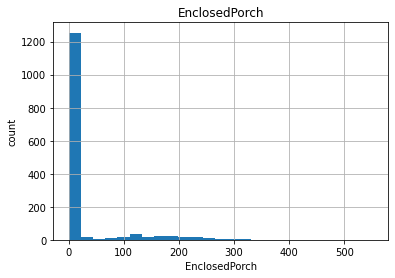

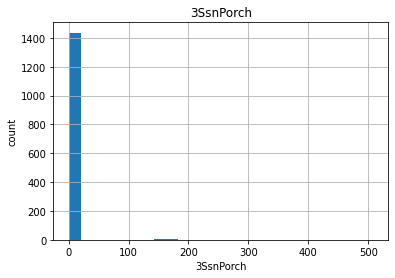

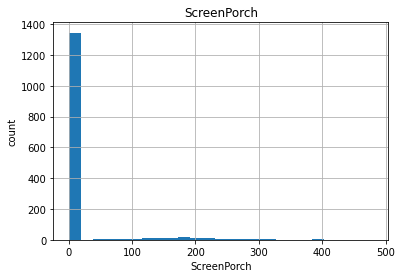

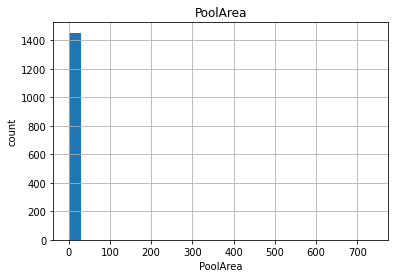

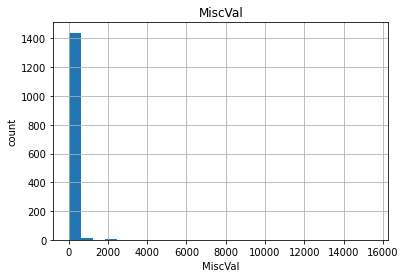

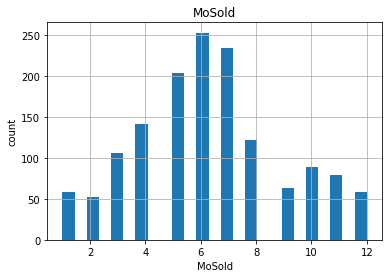

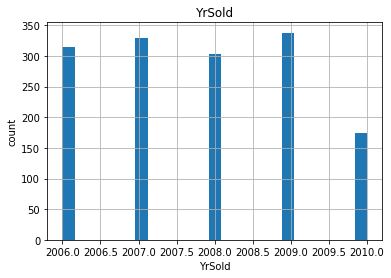

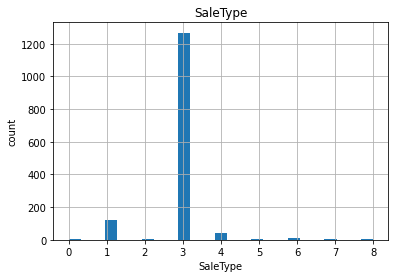

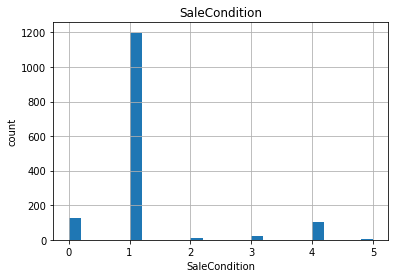

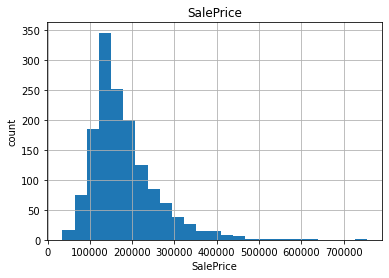

In [13]:
for feature in df.columns:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

## **Converting to Normal distribution**

In [4]:
df_nd = df

In [6]:
for feature in df_nd.columns:
  df_nd[feature] = np.log(df_nd[feature])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
df_nd

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.094345,0.0,4.174387,9.041922,-inf,1.098612,0.693147,-inf,1.098612,0.693147,2.079442,1.609438,1.098612,0.0,0.000000,1.945910,1.609438,7.602401,7.602401,1.386294,1.609438,1.098612,0.693147,0.000000,5.278115,0.000000,-inf,-inf,0.000000,0.0,1.098612,-inf,6.559615,0.693147,-inf,5.010635,6.752270,0.693147,-inf,-inf,-inf,6.752270,6.749931,-inf,7.444249,0.0,-inf,0.693147,0.0,1.098612,0.0,0.000000,2.079442,-inf,-inf,1.098612,0.000000,7.602401,0.000000,0.693147,6.306275,0.0,-inf,-inf,-inf,4.110874,-inf,-inf,-inf,-inf,-inf,0.693147,7.604894,1.098612,0.000000,12.247694
1,2.995732,0.0,4.382027,9.169518,-inf,1.098612,0.693147,-inf,0.693147,0.693147,1.609438,1.945910,1.098612,0.0,1.098612,1.791759,2.079442,7.588830,7.588830,1.386294,1.609438,2.079442,2.397895,0.693147,-inf,0.693147,-inf,0.693147,0.000000,0.0,-inf,0.693147,6.885510,0.693147,-inf,5.648974,7.140453,0.693147,-inf,-inf,-inf,7.140453,-inf,-inf,7.140453,-inf,0.0,0.693147,-inf,1.098612,0.0,0.693147,1.791759,-inf,0.000000,0.000000,0.000000,7.588830,0.000000,0.693147,6.131226,0.0,-inf,-inf,5.697093,-inf,-inf,-inf,-inf,-inf,-inf,1.609438,7.604396,1.098612,0.000000,12.109011
2,4.094345,0.0,4.219508,9.328123,-inf,0.693147,0.693147,-inf,1.098612,0.693147,2.079442,1.609438,1.098612,0.0,0.000000,1.945910,1.609438,7.601402,7.601902,1.386294,1.609438,1.098612,0.693147,0.000000,5.087596,0.000000,-inf,-inf,0.000000,0.0,0.693147,-inf,6.186209,0.693147,-inf,6.073045,6.824374,0.693147,-inf,-inf,-inf,6.824374,6.763885,-inf,7.487734,0.0,-inf,0.693147,0.0,1.098612,0.0,0.000000,1.791759,-inf,0.000000,0.000000,0.000000,7.601402,0.000000,0.693147,6.410175,0.0,-inf,-inf,-inf,3.737670,-inf,-inf,-inf,-inf,-inf,2.197225,7.604894,1.098612,0.000000,12.317167
3,4.248495,0.0,4.094345,9.164296,-inf,0.693147,0.693147,-inf,1.386294,0.693147,1.791759,1.609438,1.098612,0.0,0.000000,1.945910,1.609438,7.557473,7.585789,1.386294,1.609438,2.197225,2.484907,0.693147,-inf,0.693147,-inf,1.386294,0.693147,-inf,1.098612,0.693147,5.375278,0.693147,-inf,6.291569,6.628041,0.693147,0.000000,-inf,-inf,6.867974,6.628041,-inf,7.448334,0.0,-inf,0.000000,-inf,1.098612,0.0,0.000000,1.945910,-inf,0.000000,1.098612,1.386294,7.599902,0.693147,1.098612,6.464588,0.0,-inf,-inf,-inf,3.555348,5.605802,-inf,-inf,-inf,-inf,0.693147,7.603898,1.098612,1.386294,11.849398
4,4.094345,0.0,4.430817,9.565214,-inf,0.693147,0.693147,-inf,0.693147,0.693147,0.000000,1.609438,1.098612,0.0,0.000000,2.079442,1.609438,7.600902,7.600902,1.386294,1.609438,1.098612,0.693147,0.000000,5.857933,0.000000,-inf,-inf,0.000000,0.0,0.000000,-inf,6.484635,0.693147,-inf,6.194405,7.043160,0.693147,-inf,-inf,-inf,7.043160,6.959399,-inf,7.695303,0.0,-inf,0.693147,0.0,1.386294,0.0,0.000000,2.197225,-inf,0.000000,0.000000,0.000000,7.600902,0.000000,1.098612,6.728629,0.0,-inf,-inf,5.257495,4.430817,-inf,-inf,-inf,-inf,-inf,2.484907,7.604894,1.098612,0.000000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [23]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,1.0,65.0,8450,0.0,3.0,2.0,0.0,3.0,2.0,8.0,5.0,3.0,1.0,1.0,7,5,2003,2003,4.0,5.0,3.0,2.0,1.0,196.0,1.0,0.0,0.0,1.0,1.0,3.0,0.0,706,2.0,0,150,856,2.0,0.0,0.0,0.0,856,854,0,1710,1,0,2,1,3,1,1.0,8,0.0,0,3.0,1.0,2003.0,1.0,2,548,1.0,0.0,0.0,0,61,0,0,0,0,0,2,2008,3.0,1.0,208500
1,20,1.0,80.0,9600,0.0,3.0,2.0,0.0,2.0,2.0,5.0,7.0,3.0,1.0,3.0,6,8,1976,1976,4.0,5.0,8.0,11.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,0.0,2.0,978,2.0,0,284,1262,2.0,0.0,0.0,0.0,1262,0,0,1262,0,1,2,0,3,1,2.0,6,0.0,1,1.0,1.0,1976.0,1.0,2,460,1.0,0.0,0.0,298,0,0,0,0,0,0,5,2007,3.0,1.0,181500
2,60,1.0,68.0,11250,0.0,2.0,2.0,0.0,3.0,2.0,8.0,5.0,3.0,1.0,1.0,7,5,2001,2002,4.0,5.0,3.0,2.0,1.0,162.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,486,2.0,0,434,920,2.0,0.0,0.0,0.0,920,866,0,1786,1,0,2,1,3,1,1.0,6,0.0,1,1.0,1.0,2001.0,1.0,2,608,1.0,0.0,0.0,0,42,0,0,0,0,0,9,2008,3.0,1.0,223500
3,70,1.0,60.0,9550,0.0,2.0,2.0,0.0,4.0,2.0,6.0,5.0,3.0,1.0,1.0,7,5,1915,1970,4.0,5.0,9.0,12.0,2.0,0.0,2.0,0.0,4.0,2.0,0.0,3.0,2.0,216,2.0,0,540,756,2.0,1.0,0.0,0.0,961,756,0,1717,1,0,1,0,3,1,1.0,7,0.0,1,3.0,4.0,1998.0,2.0,3,642,1.0,0.0,0.0,0,35,272,0,0,0,0,2,2006,3.0,4.0,140000
4,60,1.0,84.0,14260,0.0,2.0,2.0,0.0,2.0,2.0,1.0,5.0,3.0,1.0,1.0,8,5,2000,2000,4.0,5.0,3.0,2.0,1.0,350.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,655,2.0,0,490,1145,2.0,0.0,0.0,0.0,1145,1053,0,2198,1,0,2,1,4,1,1.0,9,0.0,1,1.0,1.0,2000.0,1.0,3,836,1.0,0.0,0.0,192,84,0,0,0,0,0,12,2008,3.0,1.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,1.0,62.0,7917,0.0,3.0,2.0,0.0,3.0,2.0,11.0,5.0,3.0,1.0,1.0,6,5,1999,2000,4.0,5.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,3.0,1.0,0,2.0,0,953,953,2.0,0.0,0.0,0.0,953,694,0,1647,0,0,2,1,3,1,2.0,7,0.0,1,1.0,1.0,1999.0,1.0,2,460,1.0,0.0,0.0,0,40,0,0,0,0,0,8,2007,3.0,1.0,175000
1456,20,1.0,85.0,13175,0.0,3.0,2.0,0.0,3.0,2.0,10.0,5.0,3.0,1.0,3.0,6,6,1978,1988,4.0,5.0,4.0,5.0,0.0,119.0,2.0,0.0,2.0,1.0,1.0,3.0,2.0,790,4.0,163,589,1542,4.0,2.0,0.0,0.0,2073,0,0,2073,1,0,2,0,3,1,2.0,7,3.0,2,1.0,1.0,1978.0,2.0,2,500,1.0,0.0,0.0,349,0,0,0,0,0,0,2,2010,3.0,1.0,210000
1457,70,1.0,66.0,9042,0.0,3.0,2.0,0.0,3.0,2.0,6.0,5.0,3.0,1.0,1.0,7,9,1941,2006,4.0,5.0,2.0,1.0,2.0,0.0,0.0,2.0,3.0,2.0,0.0,3.0,0.0,275,2.0,0,877,1152,2.0,0.0,0.0,0.0,1188,1152,0,2340,0,0,2,0,4,1,1.0,9,0.0,2,3.0,1.0,1941.0,1.0,1,252,1.0,0.0,0.0,0,60,0,0,0,0,2500,5,2010,3.0,1.0,266500
1458,20,1.0,68.0,9717,0.0,3.0,2.0,0.0,3.0,2.0,15.0,5.0,3.0,1.0,3.0,5,6,1950,1996,2.0,5.0,8.0,11.0,2.0,0.0,2.0,0.0,2.0,2.0,1.0,2.0,0.0,49,4.0,1029,0,1078,4.0,1.0,0.0,1.0,1078,0,0,1078,1,0,1,0,2,1,1.0,5,0.0,0,3.0,1.0,1950.0,2.0,1,240,1.0,0.0,0.0,366,0,112,0,0,0,0,4,2010,3.0,1.0,142125
